# Practice Session 01+02: Data preparation

Author: <font color="blue">Marc Guiu Armengol</font>

E-mail: <font color="blue">marc.guiu01@estudiant.upf.edu</font>

Date: <font color="blue">2/10/2024</font>

<font size="+2" color="blue">Additional results: model purchased device</font>

# 1. Exploratory data analysis 

In [1]:
import pandas as pd
import seaborn as sns
import datetime

import numpy as np
from numpy import array
from numpy import argmax

import matplotlib.pyplot as plt
from matplotlib import pyplot

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# LEAVE AS-IS

input_dataset = pd.read_csv("device_db.csv", sep=",")

## 1.1. Data types and simple statistics

In [3]:
display(input_dataset[:5])

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


In [4]:
column_type=[]

for column in input_dataset.columns:
    column_type.append({'NAME':column, 'TYPE':input_dataset[column].dtype, 'NUMBER OF ELEMENTS':input_dataset[column].nunique(),'SIZE':input_dataset[column].size})
column_type_df = pd.DataFrame(column_type, columns=['NAME', 'TYPE', 'NUMBER OF ELEMENTS', 'SIZE'])
display(column_type_df)

,NAME,TYPE,NUMBER OF ELEMENTS,SIZE
0,PURCHASED_DEVICE,object,101,10000
1,DEVICE_VALUE,float64,368,10000
2,LAST_DEVICE_CHANGE,float64,76,10000
3,DATA_TRAFFIC_MONTH_1,float64,7215,10000
4,DATA_TRAFFIC_MONTH_2,float64,7182,10000
5,DATA_TRAFFIC_MONTH_3,float64,7176,10000
6,DATA_TRAFFIC_MONTH_4,float64,7124,10000
7,DATA_TRAFFIC_MONTH_5,float64,7173,10000
8,DATA_TRAFFIC_MONTH_6,float64,7074,10000
9,VOICE_TRAFFIC_MONTH_1,float64,3550,10000


In [5]:
pd.options.display.float_format = '{:.2f}'.format
float64_columns = []

for column in input_dataset.columns:
    if(input_dataset[column].dtype == np.float64):
        float64_columns.append({'NAME':column,'MEAN':np.nanmean(input_dataset[column]),'MEDIAN': np.nanmedian(input_dataset[column]) , 'MIN': np.min(input_dataset[column]) ,'MAX':np.max(input_dataset[column])})
        
float64_columns_df = pd.DataFrame(float64_columns, columns=['NAME', 'MEAN', 'MEDIAN', 'MIN', 'MAX'])
display(float64_columns_df)

,NAME,MEAN,MEDIAN,MIN,MAX
0,DEVICE_VALUE,750.48,393.00,15.00,9057.00
1,LAST_DEVICE_CHANGE,20166984.77,20170601.00,20121001.00,20190501.00
2,DATA_TRAFFIC_MONTH_1,3481.83,1208.73,0.00,127017.59
3,DATA_TRAFFIC_MONTH_2,3649.96,1294.95,0.00,111948.84
4,DATA_TRAFFIC_MONTH_3,3653.43,1310.67,0.00,111948.84
5,DATA_TRAFFIC_MONTH_4,3269.44,1176.54,0.00,87856.41
6,DATA_TRAFFIC_MONTH_5,3673.37,1287.09,0.00,121834.81
7,DATA_TRAFFIC_MONTH_6,3427.69,1277.12,0.00,90550.61
8,VOICE_TRAFFIC_MONTH_1,154.85,84.05,0.00,4220.10
9,VOICE_TRAFFIC_MONTH_2,142.57,74.90,0.00,3132.10


In [6]:
for column in input_dataset:
    print(column, ': ')
    print(input_dataset[column].describe(), '\n')

PURCHASED_DEVICE : 
count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object 

DEVICE_VALUE : 
count   9690.00
mean     750.48
std      979.71
min       15.00
25%      297.00
50%      393.00
75%      609.00
max     9057.00
Name: DEVICE_VALUE, dtype: float64 

LAST_DEVICE_CHANGE : 
count       7682.00
mean    20166984.77
std        10925.77
min     20121001.00
25%     20160801.00
50%     20170601.00
75%     20171001.00
max     20190501.00
Name: LAST_DEVICE_CHANGE, dtype: float64 

DATA_TRAFFIC_MONTH_1 : 
count     8868.00
mean      3481.83
std       6364.54
min          0.00
25%         51.92
50%       1208.73
75%       4249.16
max     127017.59
Name: DATA_TRAFFIC_MONTH_1, dtype: float64 

DATA_TRAFFIC_MONTH_2 : 
count     8841.00
mean      3649.96
std       6444.36
min

<font size="+2" color="blue">When comparing the results for DURATION_LINE with those from the describe function, the key differences are as follows:

<font size="+1" color="blue">The describe function provides additional statistics beyond the ones I computed. Specifically:
    
<font size="+0" color="blue">    -Count: Displays the number of non-null entries, which I did not include in my calculations.
    
<font size="+0" color="blue">    -Standard Deviation (std): Measures the spread of the data, and this was not part of my statistics
    
<font size="+0" color="blue">    -25th Percentile (25%) and 75th Percentile (75%): These quartile values are provided by describe, whereas I only calculated the median (50th percentile).
    
<font size="+1" color="blue">The statistics that match between my computation and describe are:
    
<font size="+0" color="blue">    -Mean: Matches exactly.
    
<font size="+0" color="blue">    -Min and Max: Both align with the describe function.
    
<font size="+0" color="blue">    -Median (50%): My median corresponds to the 50th percentile in describe.</font>

## 1.2. Inventory of device models

In [7]:
previous_device_model_freq = input_dataset['PREVIOUS_DEVICE_MODEL'].value_counts().reset_index()
previous_device_model_freq.columns = ['PREVIOUS_DEVICE_MODEL', 'FREQUENCY']
previous_device_model_freq = previous_device_model_freq.sort_values(by='FREQUENCY', ascending=False)

display(previous_device_model_freq)

previous_device_brand_freq = input_dataset['PREVIOUS_DEVICE_BRAND'].value_counts().reset_index()
previous_device_brand_freq.columns = ['PREVIOUS_DEVICE_BRAND', 'FREQUENCY']
previous_device_brand_freq = previous_device_brand_freq.sort_values(by='FREQUENCY', ascending=False)

display(previous_device_brand_freq)


,PREVIOUS_DEVICE_MODEL,FREQUENCY
0,iPhone 7,425
1,iPhone 6,250
2,Samsung Galaxy J5,243
3,iPhone 6S,212
4,Samsung Galaxy J1 Mini,204
...,...,...
413,M13,1
414,ENERGY X PLUS,1
415,"Nokia 220, RM-969",1
416,Studio Touch,1


,PREVIOUS_DEVICE_BRAND,FREQUENCY
0,Samsung,1877
1,Outros,1592
2,Apple,1548
3,Motorola,638
4,LG,514


<font size="+1" color="blue">The most common device model and brand do not match because some brands have a wider range of device models. Brands with more models are likely to have their market share spread across multiple devices, leading to a situation where a brand is common overall, but no single model dominates in frequency.</font>

# 2. Feature engineering

## 2.1. Missing values management

In [8]:
nan_columns = []

for column in input_dataset.columns:
    nan_percentage = input_dataset[column].isna().mean() * 100
    if nan_percentage > 0:
        nan_columns.append({'COLUMN_NAME': column, 'PERCENTAGE_NAN': nan_percentage})

nan_columns_df = pd.DataFrame(nan_columns)
nan_columns_df['PERCENTAGE_NAN'] = nan_columns_df['PERCENTAGE_NAN'].map('{:,.2f}%'.format)

display(nan_columns_df)

,COLUMN_NAME,PERCENTAGE_NAN
0,PURCHASED_DEVICE,1.47%
1,DEVICE_VALUE,3.10%
2,LAST_DEVICE_CHANGE,23.18%
3,DATA_TRAFFIC_MONTH_1,11.32%
4,DATA_TRAFFIC_MONTH_2,11.59%
5,DATA_TRAFFIC_MONTH_3,11.54%
6,DATA_TRAFFIC_MONTH_4,11.83%
7,DATA_TRAFFIC_MONTH_5,11.34%
8,DATA_TRAFFIC_MONTH_6,14.65%
9,VOICE_TRAFFIC_MONTH_1,11.32%


In [9]:
df_cleaned = input_dataset.dropna(subset=['PURCHASED_DEVICE', 'DEVICE_VALUE', 'PREVIOUS_DEVICE_MODEL'])

display(df_cleaned)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,0.00,0.00,0.00,0.00,20150622.00,NaN,42.00,iPhone 6S,Apple Inc,Apple
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,0.00,0.00,0.00,0.00,20170419.00,20.00,20.00,iPhone 7 Plus,Apple Inc,Apple
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,9.00,9.00,9.00,9.00,20130326.00,8.00,69.00,Samsung Galaxy J7,Samsung Korea,Samsung
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaN,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,0.00,0.00,0.00,0.00,20110214.00,NaN,94.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


In [10]:
df_imputed = df_cleaned.copy()
for column in df_imputed.columns:
    df_imputed[column] = df_imputed[column].fillna(0)

display(df_imputed)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,0.00,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,0.00,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,0.00,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,0.00,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,0.00,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,0.00,0.00,0.00,0.00,20150622.00,0.00,42.00,iPhone 6S,Apple Inc,Apple
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,0.00,0.00,0.00,0.00,20170419.00,20.00,20.00,iPhone 7 Plus,Apple Inc,Apple
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,9.00,9.00,9.00,9.00,20130326.00,8.00,69.00,Samsung Galaxy J7,Samsung Korea,Samsung
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,0.00,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,0.00,0.00,0.00,0.00,20110214.00,0.00,94.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


In [11]:
df_imputed['LINE_ACTIVATION_DATE'] = df_imputed['LINE_ACTIVATION_DATE'].fillna(df_imputed['LAST_DEVICE_CHANGE'])

display(df_imputed)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,0.00,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,0.00,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,0.00,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,0.00,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,0.00,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,0.00,0.00,0.00,0.00,20150622.00,0.00,42.00,iPhone 6S,Apple Inc,Apple
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,0.00,0.00,0.00,0.00,20170419.00,20.00,20.00,iPhone 7 Plus,Apple Inc,Apple
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,9.00,9.00,9.00,9.00,20130326.00,8.00,69.00,Samsung Galaxy J7,Samsung Korea,Samsung
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,0.00,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,0.00,0.00,0.00,0.00,20110214.00,0.00,94.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


In [12]:
display(df_imputed[:5])

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,0.00,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,0.00,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,0.00,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,0.00,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


In [13]:
rows1 = input_dataset.shape[0]
rows2 = df_imputed.shape[0]
percentage = 100*(rows1-rows2)/rows1
print('Rows in the original dataset:', input_dataset.shape[0], '\n')
print('Rows in the now dataset:', df_imputed.shape[0], '(', percentage, '% less)')

Rows in the original dataset: 10000 

Rows in the now dataset: 5988 ( 40.12 % less)


## 2.2. Distributions, outliers, and correlations

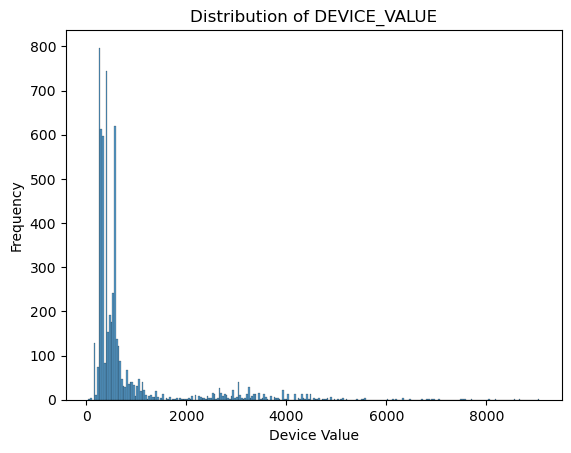

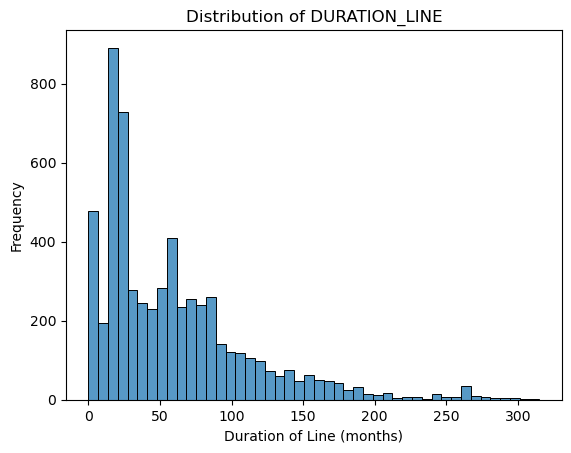

In [14]:
ax1 = sns.histplot(df_imputed['DEVICE_VALUE'], kde=False)
ax1.set(title='Distribution of DEVICE_VALUE', xlabel='Device Value', ylabel='Frequency')
plt.show()

ax2 = sns.histplot(df_imputed['DURATION_LINE'], kde=False)
ax2.set(title='Distribution of DURATION_LINE', xlabel='Duration of Line (months)', ylabel='Frequency')
plt.show()


<font size="+1" color="blue">Distribution of DEVICE_VALUE:

<font size="+0" color="blue">The distribution shows a strong concentration in lower values, with a right tail (asymmetric distribution). It appears to be a unimodal distribution, meaning it has a single peak or mode, and it's right-skewed. It also has some outliers at very high values such as 8000 value.

<font size="+1" color="blue">Distribution of DURATION_LINE:

<font size="+0" color="blue">The distribution of line durations shows that most customers have a line duration concentrated in a certain range, with few extremely long durations. It is another unimodal distribution with a right tail.</font>

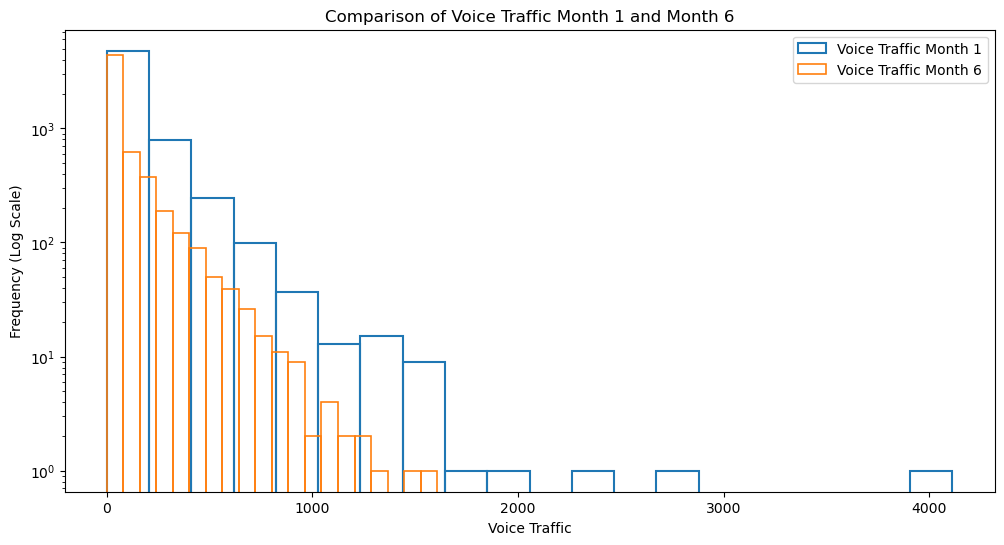

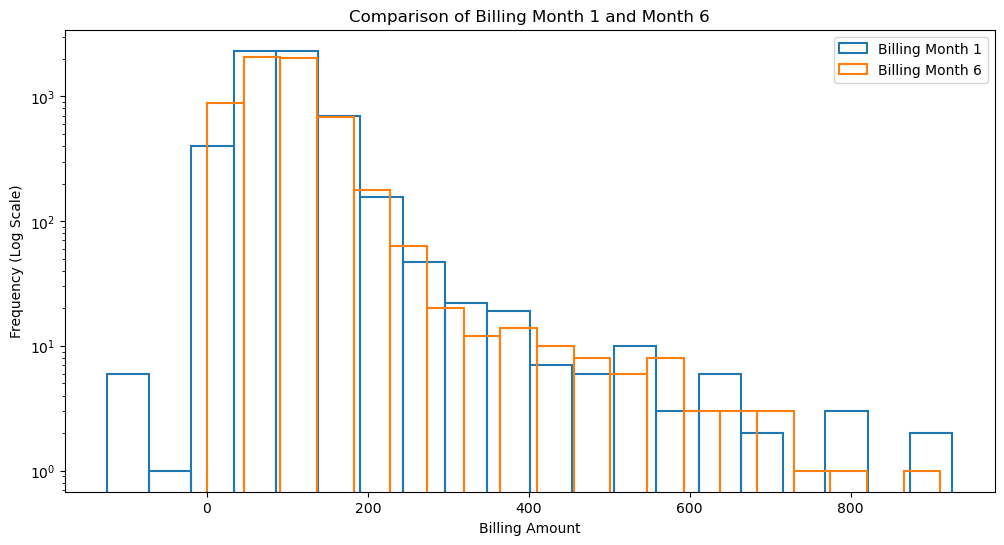

In [15]:
plt.figure(figsize=(12, 6))
ax1 = sns.histplot(data=df_imputed, x='VOICE_TRAFFIC_MONTH_1', bins=20, fill=False, label='Voice Traffic Month 1')
sns.histplot(data=df_imputed, x='VOICE_TRAFFIC_MONTH_6', bins=20, fill=False, label='Voice Traffic Month 6')
ax1.set(title='Comparison of Voice Traffic Month 1 and Month 6', xlabel='Voice Traffic', ylabel='Frequency (Log Scale)')
plt.yscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
ax2 = sns.histplot(data=df_imputed, x='BILLING_MONTH_1', bins=20, fill=False, label='Billing Month 1')
sns.histplot(data=df_imputed, x='BILLING_MONTH_6', bins=20, fill=False, label='Billing Month 6')
ax2.set(title='Comparison of Billing Month 1 and Month 6', xlabel='Billing Amount', ylabel='Frequency (Log Scale)')
plt.yscale('log')
plt.legend()
plt.show()


<font size="+1" color="blue">Voice Traffic Month 1 vs Month 6:
    
<font size="+0" color="blue">The histogram for VOICE_TRAFFIC_MONTH_1 shows higher values at the lower end compared to VOICE_TRAFFIC_MONTH_6, indicating that many customers utilize their voice traffic more in the first month. As the months progress, some customers may decrease their usage, resulting in a right-skewed distribution in month 6. The logarithmic scale allows us to visualize the lower frequency of high usage more clearly.
    
<font size="+1" color="blue">Billing Month 1 vs Month 6:
    
<font size="+0" color="blue">For BILLING_MONTH_1, we observe a more concentrated billing amount at lower values, indicating many customers with lower usage initially. In contrast, BILLING_MONTH_6 shows higher billing amounts as customers adjust their plans or increase their usage over time.

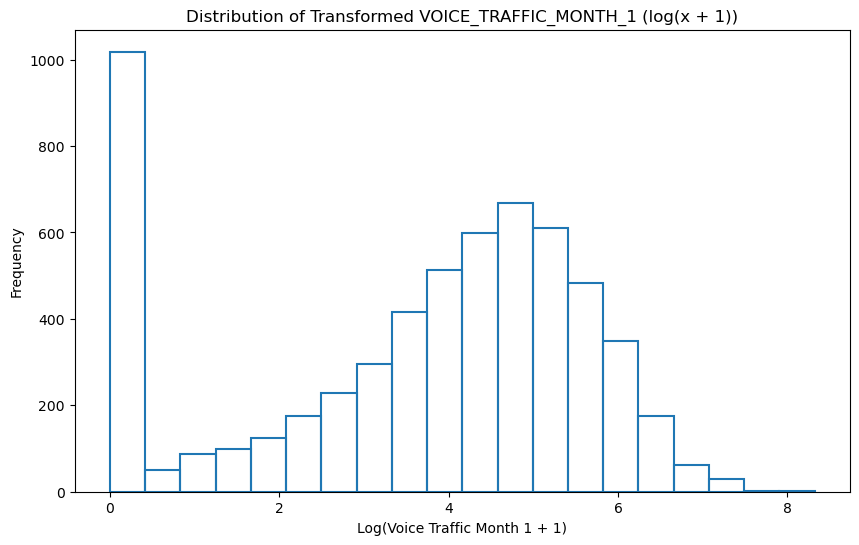

In [16]:
df_imputed['VOICE_TRAFFIC_MONTH_1_LOG'] = np.log(df_imputed['VOICE_TRAFFIC_MONTH_1'] + 1)

plt.figure(figsize=(10, 6))
ax = sns.histplot(df_imputed['VOICE_TRAFFIC_MONTH_1_LOG'], bins=20, fill=False)
ax.set(title='Distribution of Transformed VOICE_TRAFFIC_MONTH_1 (log(x + 1))', xlabel='Log(Voice Traffic Month 1 + 1)', ylabel='Frequency')
plt.show()


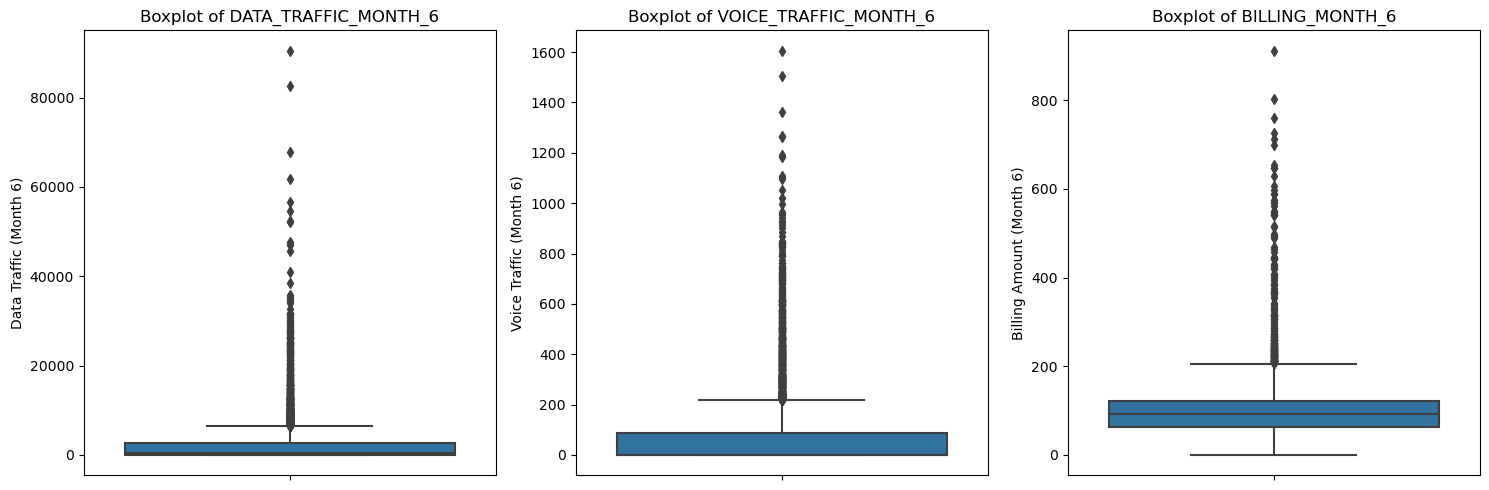

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_imputed['DATA_TRAFFIC_MONTH_6'])
plt.title('Boxplot of DATA_TRAFFIC_MONTH_6')
plt.ylabel('Data Traffic (Month 6)')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_imputed['VOICE_TRAFFIC_MONTH_6'])
plt.title('Boxplot of VOICE_TRAFFIC_MONTH_6')
plt.ylabel('Voice Traffic (Month 6)')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_imputed['BILLING_MONTH_6'])
plt.title('Boxplot of BILLING_MONTH_6')
plt.ylabel('Billing Amount (Month 6)')

plt.tight_layout()
plt.show()


<font size="+1" color="blue">As we have too many outliers out of the 1.5 IQR range, i would put higher thresholds to avoid loosing too many data. For the DATA_TRAFFIC_MONTH_6, i would put the threshold at 40000, because we have a quite dense amount of outliers under that point. The same happens with VOICE_TRAFFIC_MONTH_6, but in this case i would put it at 1000. Following the same logic, por the BILLING_AMOUNT i would put it at 600. In this way i think that we could avoid loosing too many data.

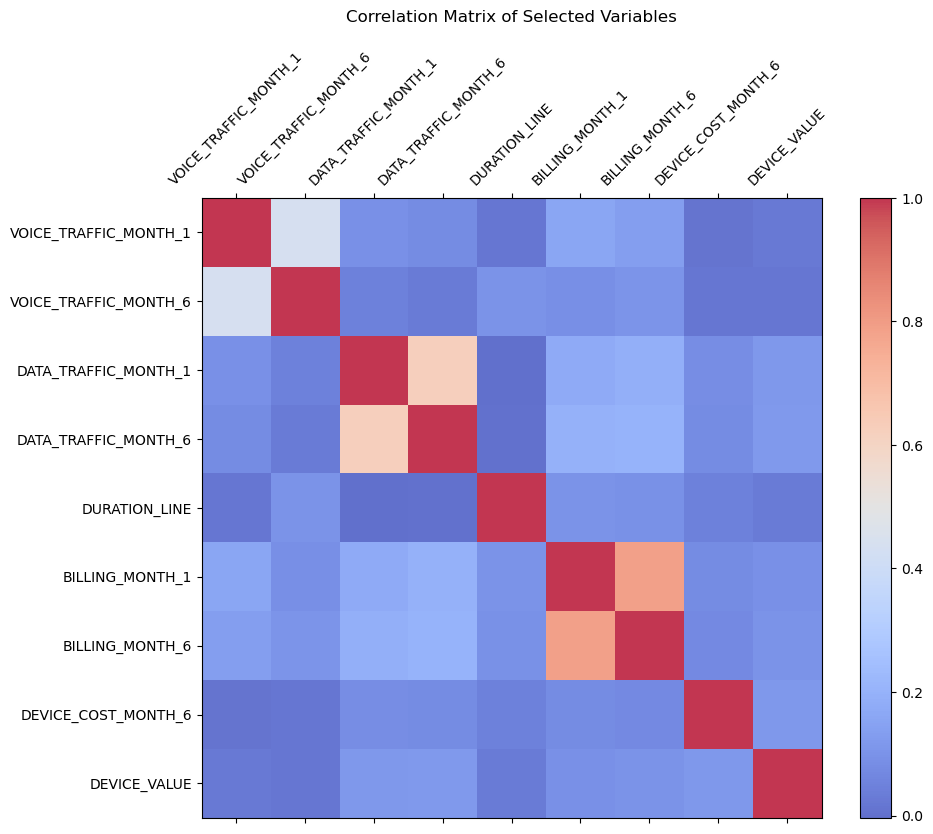

In [18]:
correlation_matrix = df_imputed[['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_6', 
                                    'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_6', 
                                    'DURATION_LINE', 'BILLING_MONTH_1', 
                                    'BILLING_MONTH_6', 'DEVICE_COST_MONTH_6', 
                                    'DEVICE_VALUE']].corr(method='pearson', numeric_only=True)

plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm', alpha=0.8)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title('Correlation Matrix of Selected Variables', pad=20)
plt.show()


<font size="+1" color="blue">In general, the billing appears to be more correlated with data traffic than with voice traffic. This could reflect current usage trends, where data consumption has a more significant impact on billing due to higher data plans or usage-based pricing models.

## 2.3. Date management and period calculation

In [19]:
latest_device_change_float = df_imputed['LAST_DEVICE_CHANGE'].max()
latest_device_change_int = int(latest_device_change_float)

latest_device_change_str = str(latest_device_change_int)

latest_change = datetime.datetime.strptime(latest_device_change_str, '%Y%m%d')

print('Last change:',latest_change)

now = latest_change + datetime.timedelta(days=30)

print('Now:',now)


Last change: 2019-05-01 00:00:00
Now: 2019-05-31 00:00:00


In [20]:
df_imputed['LAST_DEVICE_CHANGE'] = df_imputed['LAST_DEVICE_CHANGE'].replace(0, np.nan)
df_imputed['LAST_DEVICE_CHANGE'].fillna(20000101.0, inplace=True)
series_converted = pd.to_datetime(df_imputed['LAST_DEVICE_CHANGE'].astype(int), format='%Y%m%d')
difference = now - series_converted
df_imputed['MONTHS_LAST_DEVICE'] = difference / (30 * datetime.timedelta(days=1))
df_imputed['MONTHS_LAST_DEVICE'] = df_imputed['MONTHS_LAST_DEVICE'].fillna(0).astype(int)
display(df_imputed['MONTHS_LAST_DEVICE'])

0       236
1        26
2       236
3        20
4         5
       ... 
9994    236
9995     26
9996     14
9997    236
9999    236
Name: MONTHS_LAST_DEVICE, Length: 5988, dtype: int32

In [21]:
df_imputed['LINE_ACTIVATION_DATE'] = pd.to_datetime(df_imputed['LINE_ACTIVATION_DATE'].astype(int), format='%Y%m%d', errors='coerce')
df_imputed['DURATION_LINE'] = (now - df_imputed['LINE_ACTIVATION_DATE']).dt.days
average_duration_line = df_imputed['DURATION_LINE'].mean()
average_duration_years = average_duration_line / 365  # Assuming 365 days in a year
display(df_imputed['DURATION_LINE'])
print("Average DURATION_LINE in years:", average_duration_years)


0      5275.00
1       786.00
2      5527.00
3      2836.00
4      1809.00
         ...  
9994   1439.00
9995    772.00
9996   2257.00
9997   3028.00
9999   3028.00
Name: DURATION_LINE, Length: 5988, dtype: float64

Average DURATION_LINE in years: 5.530409966249752



## 2.4. Standarization and scaling of numerical variables

In [22]:
columns_to_scale = [
    'DATA_TRAFFIC_MONTH_1',
    'VOICE_TRAFFIC_MONTH_1',
    'BILLING_MONTH_1',
    'DEVICE_COST_MONTH_1'
]

for column in columns_to_scale:
    df_imputed[column + '_STANDARD'] = StandardScaler().fit_transform(df_imputed[[column]])
    df_imputed[column + '_MINMAX'] = MinMaxScaler().fit_transform(df_imputed[[column]])
display(df_imputed)


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,PREVIOUS_DEVICE_BRAND,VOICE_TRAFFIC_MONTH_1_LOG,DATA_TRAFFIC_MONTH_1_STANDARD,DATA_TRAFFIC_MONTH_1_MINMAX,VOICE_TRAFFIC_MONTH_1_STANDARD,VOICE_TRAFFIC_MONTH_1_MINMAX,BILLING_MONTH_1_STANDARD,BILLING_MONTH_1_MINMAX,DEVICE_COST_MONTH_1_STANDARD,DEVICE_COST_MONTH_1_MINMAX
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,20000101.00,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,Motorola,3.88,-0.36,0.00,-0.41,0.01,-0.20,0.20,0.02,0.00
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,Samsung,1.55,-0.40,0.00,-0.63,0.00,-0.80,0.16,-0.11,0.00
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,20000101.00,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,Motorola,3.30,-0.36,0.00,-0.52,0.01,0.35,0.23,-0.11,0.00
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,Apple,5.17,0.29,0.04,0.23,0.04,-0.60,0.18,-0.05,0.00
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,Outros,5.95,0.43,0.04,1.27,0.09,0.17,0.22,-0.11,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,20000101.00,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,Apple,6.39,1.47,0.10,2.33,0.15,0.99,0.27,-0.11,0.00
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,Apple,5.52,3.81,0.22,0.58,0.06,-0.72,0.17,-0.11,0.00
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,Samsung,4.49,-0.27,0.01,-0.21,0.02,0.55,0.25,-0.01,0.00
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20000101.00,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,Motorola,3.68,-0.41,0.00,-0.46,0.01,1.19,0.29,-0.11,0.00


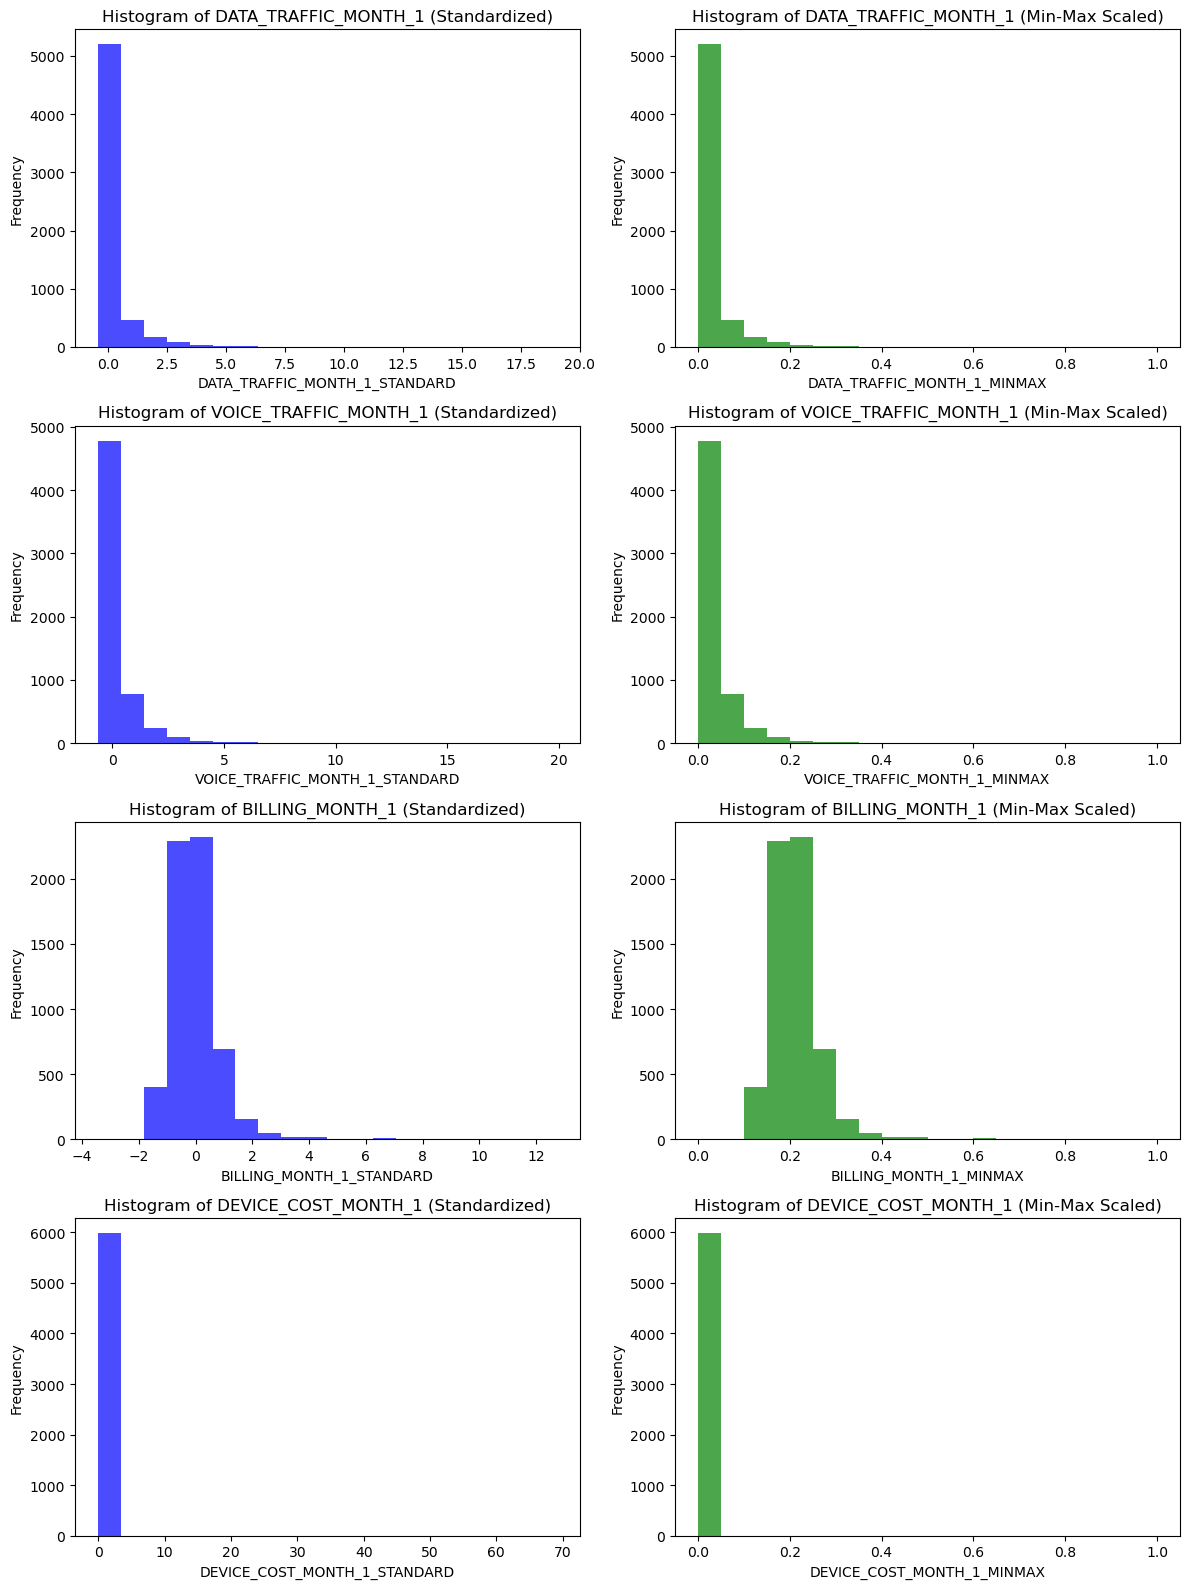

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()
for i, column in enumerate(columns_to_scale):
    axes[i * 2].hist(df_imputed[column + '_STANDARD'], bins=20, color='blue', alpha=0.7)
    axes[i * 2].set_title(f'Histogram of {column} (Standardized)')
    axes[i * 2].set_xlabel(column + '_STANDARD')
    axes[i * 2].set_ylabel('Frequency')

    axes[i * 2 + 1].hist(df_imputed[column + '_MINMAX'], bins=20, color='green', alpha=0.7)
    axes[i * 2 + 1].set_title(f'Histogram of {column} (Min-Max Scaled)')
    axes[i * 2 + 1].set_xlabel(column + '_MINMAX')
    axes[i * 2 + 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## 2.5. Convert categorical columns to dummy binary variables

In [24]:
df_imputed['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = LabelEncoder().fit_transform(df_imputed['PREVIOUS_DEVICE_BRAND'])

display(df_imputed[['PREVIOUS_DEVICE_BRAND', 'PREVIOUS_DEVICE_BRAND_INT_ENCODED']])

,PREVIOUS_DEVICE_BRAND,PREVIOUS_DEVICE_BRAND_INT_ENCODED
0,Motorola,2
1,Samsung,4
2,Motorola,2
3,Apple,0
4,Outros,3
...,...,...
9994,Apple,0
9995,Apple,0
9996,Samsung,4
9997,Motorola,2


In [25]:
previous_device_manuf_dummies = pd.get_dummies(df_imputed['PREVIOUS_DEVICE_MANUF'], prefix='PREV_DEV_MANUF')
df_imputed_with_dummies = df_imputed.join(previous_device_manuf_dummies)
display(df_imputed_with_dummies)


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,PREV_DEV_MANUF_Telit Communications SpA,PREV_DEV_MANUF_Topmax Glory Limited,PREV_DEV_MANUF_Umi Network Technology Co Limited,PREV_DEV_MANUF_United Mobile,PREV_DEV_MANUF_United Time Hong Kong Ltd,PREV_DEV_MANUF_Vikin Communication Technology Co Limited,PREV_DEV_MANUF_Vogtec (H.K) Co Ltd,PREV_DEV_MANUF_Xiaomi Communications Co Ltd,PREV_DEV_MANUF_ZTE Corporation,PREV_DEV_MANUF_u-blox AG
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,20000101.00,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,False,False,False,False,False,False,False,False,False,False
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,False,False,False,False,False,False,False,False,False,False
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,20000101.00,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,False,False,False,False,False,False,False,False,False,False
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,False,False,False,False,False,False,False,False,False,False
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,20000101.00,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,False,False,False,False,False,False,False,False,False,False
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,False,False,False,False,False,False,False,False,False,False
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,False,False,False,False,False,False,False,False,False,False
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20000101.00,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,False,False,False,False,False,False,False,False,False,False


## 2.6. Feature generation

In [26]:
prefixes = {
    'DATA_TRAFFIC': 'DATA_TRAFFIC_MONTH_',
    'VOICE_TRAFFIC': 'VOICE_TRAFFIC_MONTH_',
    'BILLING': 'BILLING_MONTH_',
    'DEVICE_COST': 'DEVICE_COST_MONTH_'
}
metrics = ['MEAN', 'MAX', 'MIN', 'RANGE']

for key, prefix in prefixes.items():
    monthly_columns = [f'{prefix}{i}' for i in range(1, 7)]
    for metric in metrics:
        if metric == 'MEAN':
            df_imputed[f'{key}_{metric}'] = df_imputed[monthly_columns].mean(axis=1)
        elif metric == 'MAX':
            df_imputed[f'{key}_{metric}'] = df_imputed[monthly_columns].max(axis=1)
        elif metric == 'MIN':
            df_imputed[f'{key}_{metric}'] = df_imputed[monthly_columns].min(axis=1)
        elif metric == 'RANGE':
            df_imputed[f'{key}_{metric}'] = df_imputed[f'{key}_MAX'] - df_imputed[f'{key}_MIN']
display(df_imputed)


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,VOICE_TRAFFIC_MIN,VOICE_TRAFFIC_RANGE,BILLING_MEAN,BILLING_MAX,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,20000101.00,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,21.80,57.90,92.96,107.93,85.00,22.93,12.00,12.00,12.00,0.00
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.50,4.40,49.44,56.56,47.00,9.56,0.00,0.00,0.00,0.00
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,20000101.00,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,26.10,192.60,121.78,129.14,113.77,15.37,0.00,0.00,0.00,0.00
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,119.00,112.20,58.22,60.93,55.99,4.94,6.00,6.00,6.00,0.00
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,383.90,109.70,110.69,107.99,2.70,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,20000101.00,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,512.10,289.80,176.41,204.96,160.57,44.39,0.00,0.00,0.00,0.00
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,119.70,134.00,52.49,52.97,51.67,1.30,0.00,0.00,0.00,0.00
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,0.00,88.50,134.99,134.99,134.99,0.00,9.00,9.00,9.00,0.00
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20000101.00,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,0.00,38.50,157.48,203.53,134.99,68.54,0.00,0.00,0.00,0.00


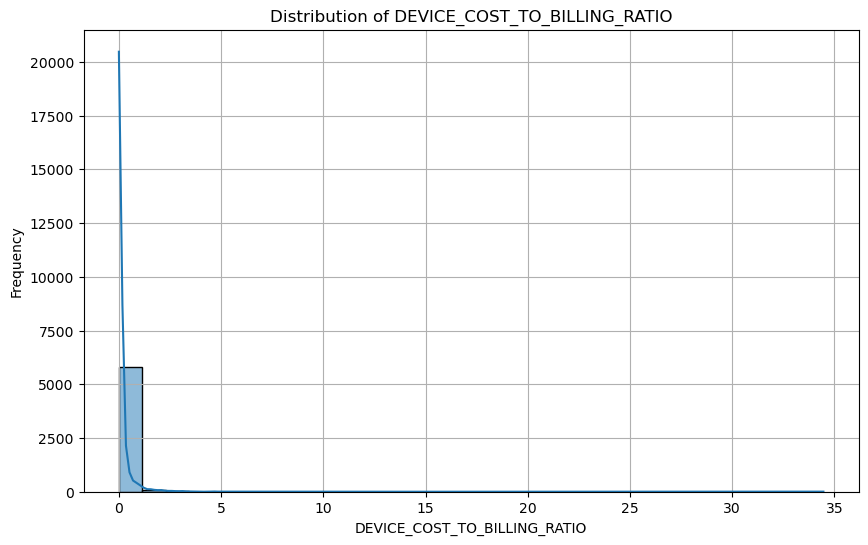

In [27]:
df_imputed['DEVICE_COST_TO_BILLING_RATIO'] = df_imputed['DEVICE_COST_MEAN'] / df_imputed['BILLING_MEAN']
plt.figure(figsize=(10, 6))
sns.histplot(df_imputed['DEVICE_COST_TO_BILLING_RATIO'], bins=30, fill=True, kde=True)
plt.title('Distribution of DEVICE_COST_TO_BILLING_RATIO')
plt.xlabel('DEVICE_COST_TO_BILLING_RATIO')
plt.ylabel('Frequency')
plt.grid()
plt.show()


<font size="+1" color="blue">The DEVICE_COST_TO_BILLING_RATIO distribution is right-skewed, with most values clustered around lower ratios and fewer instances of higher ratios. This suggests that device costs are generally modest compared to billing amounts. 

## 2.7. Text parsing/processing

In [28]:
df_imputed['PURCHASED_DEVICE'] = df_imputed['PURCHASED_DEVICE'].str.replace('\xa0', ' ').str.strip()
temp_columns = df_imputed['PURCHASED_DEVICE'].str.split('_', n=1, expand=True)
temp_columns[['PURCHASED_DEVICE_MANUFACTURER', 'PURCHASED_DEVICE_MODEL']] = \
    temp_columns[1].str.split(' ', n=1, expand=True)

df_imputed['PURCHASED_DEVICE_CODE'] = temp_columns[0]
df_imputed['PURCHASED_DEVICE_MANUFACTURER'] = temp_columns['PURCHASED_DEVICE_MANUFACTURER']
df_imputed['PURCHASED_DEVICE_MODEL'] = temp_columns['PURCHASED_DEVICE_MODEL']

display(df_imputed[['PURCHASED_DEVICE', 'PURCHASED_DEVICE_CODE', 'PURCHASED_DEVICE_MANUFACTURER', 'PURCHASED_DEVICE_MODEL']])


,PURCHASED_DEVICE,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,TGMO36762000,MOTOROLA,XT1941 SMARTPHONE PRETO
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07


In [29]:
devices_per_manufacturer_purchased = df_imputed['PURCHASED_DEVICE_MANUFACTURER'].value_counts().reset_index()
devices_per_manufacturer_purchased.columns = ['Manufacturer', 'Device Count']

devices_per_manufacturer_previous = df_imputed['PREVIOUS_DEVICE_MANUF'].value_counts().reset_index()
devices_per_manufacturer_previous.columns = ['Manufacturer', 'Device Count']

print("Devices per Manufacturer in PURCHASED_DEVICE_MANUFACTURER:")
display(devices_per_manufacturer_purchased)

print("Devices per Manufacturer in PREVIOUS_DEVICE_MANUF:")
display(devices_per_manufacturer_previous)


Devices per Manufacturer in PURCHASED_DEVICE_MANUFACTURER:


,Manufacturer,Device Count
0,LG,3556
1,SAMSUNG,1094
2,MOTOROLA,630
3,APPLE,448
4,ALCATEL,258
5,ASUS,2


Devices per Manufacturer in PREVIOUS_DEVICE_MANUF:


,Manufacturer,Device Count
0,Samsung Korea,1879
1,Apple Inc,1495
2,"Motorola Mobility LLC, a Lenovo Company",849
3,LG Electronics Inc.,506
4,TCL Communication Ltd,279
...,...,...
62,Lanxun Technology (Hong Kong) Limited,1
63,Beijing Flyscale Technologies Company Limited,1
64,Meizu Technology Co Ltd,1
65,TP-Link Technologies Co Ltd,1


## 2.8. Splitting and sampling a dataset

In [30]:
train_set, test_set = train_test_split(df_imputed, test_size=0.3, random_state=42)

print("Training set shape:", train_set.shape)
print("Testing set shape:", test_set.shape)

print("\nTraining Set:")
display(train_set)

print("\nTesting Set:")
display(test_set)


Training set shape: (4191, 63)
Testing set shape: (1797, 63)

Training Set:


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
1989,TGSA32064000_SAMSUNG J415G SMART PRETO PPB/PI3...,489.00,20170801.00,847.17,3857.65,3857.65,2247.19,2846.32,4503.65,187.60,...,145.14,2.00,13.00,13.00,13.00,0.00,0.09,TGSA32064000,SAMSUNG,J415G SMART PRETO PPB/PI324/14
8568,TGAL03267000_ALCATEL 4034E SMARTPHONE PIXI4-4 ...,321.00,20000101.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,41.99,1.01,0.00,0.00,0.00,0.00,0.00,TGAL03267000,ALCATEL,4034E SMARTPHONE PIXI4-4 PRETO
4501,TGMO36912000_MOTOROLA XT1955 SMARTPHONE AZUL NAVY,681.00,20170601.00,1887.43,1529.71,1529.71,1835.46,2248.86,1988.40,142.70,...,102.99,0.00,0.00,0.00,0.00,0.00,0.00,TGMO36912000,MOTOROLA,XT1955 SMARTPHONE AZUL NAVY
1749,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,273.00,20170501.00,3495.85,3495.85,4916.06,4916.06,3185.19,3752.19,12.80,...,113.14,0.00,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
3795,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,273.00,20150501.00,17352.23,23730.31,23730.31,40119.86,52940.04,34873.92,79.90,...,190.09,92.80,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,273.00,20170401.00,0.00,0.00,0.00,0.00,0.00,0.00,649.30,...,113.14,5.97,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
8732,DGAP05262007_APPLE IPHONE 7 128GB PRETO PPB/P...,2795.00,20160101.00,199.85,2.47,2.47,1.25,0.00,10.19,95.60,...,93.00,7.40,0.00,0.00,0.00,0.00,0.00,DGAP05262007,APPLE,IPHONE 7 128GB PRETO PPB/PI643/10
8800,TGSA32164007_SAMSUNG J610G SMART PRETO PPB/PI3...,681.00,20170601.00,721.34,837.84,837.84,303.25,459.42,1122.33,90.40,...,117.00,13.42,67.00,67.00,67.00,0.00,0.55,TGSA32164007,SAMSUNG,J610G SMART PRETO PPB/PI324/14
9075,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,831.31,0.00,0.00,41.25,64.29,369.08,0.00,...,46.86,1.31,13.00,13.00,13.00,0.00,0.27,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07



Testing Set:


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
6129,TGLG29462000_LG X410BCW SMARTPHONE PRETO PPB/P...,561.00,20160901.00,3.79,6.37,6.37,19.55,12.48,4.85,45.80,...,104.15,41.61,0.10,0.62,0.00,0.62,0.00,TGLG29462000,LG,X410BCW SMARTPHONE PRETO PPB/P1769/07
9683,TGSA29662000_SAMSUNG G950 SMART PRETO PPB/PI10...,2529.00,20150801.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,31.33,1.67,0.00,0.00,0.00,0.00,0.00,TGSA29662000,SAMSUNG,G950 SMART PRETO PPB/PI107/04
7063,TGMO362C2000_MOTOROLA XT1944 SMARTPHONE PLATINUM,465.00,20160901.00,1128.81,637.72,637.72,1543.25,829.67,1447.55,8.90,...,64.00,0.00,0.00,0.00,0.00,0.00,0.00,TGMO362C2000,MOTOROLA,XT1944 SMARTPHONE PLATINUM
2684,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,273.00,20170801.00,6208.31,7025.79,7025.79,6797.52,6911.30,5920.45,251.90,...,121.14,0.00,31.00,31.00,31.00,0.00,0.26,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
6381,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,273.00,20181001.00,3093.14,1887.45,1887.45,9436.34,12015.57,6502.68,74.70,...,83.00,10.00,13.00,13.00,13.00,0.00,0.14,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,537.00,20170201.00,0.00,0.00,0.00,0.00,0.00,0.00,162.20,...,44.99,1.75,25.83,31.00,0.00,31.00,0.57,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1840,TGSA31964007_SAMSUNG J410G SMART PRETO PPB/PI3...,345.00,20171001.00,0.00,0.00,0.00,0.00,0.00,0.00,35.50,...,27.99,8.87,0.62,0.62,0.62,0.00,0.02,TGSA31964007,SAMSUNG,J410G SMART PRETO PPB/PI324/14
6915,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,561.00,20000101.00,0.00,0.00,0.00,0.00,0.00,0.00,2.80,...,52.67,5.19,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
3513,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,273.00,20160701.00,4085.40,2180.28,2180.28,1339.71,785.55,1580.80,108.80,...,53.70,93.49,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07


In [31]:
train_stats = train_set[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe(percentiles=[.25, .50, .75])
test_stats = test_set[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe(percentiles=[.25, .50, .75])

print("Training Set Statistics:")
display(train_stats)

print("Testing Set Statistics:")
display(test_stats)


Training Set Statistics:


,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1
count,4191.00,4191.00,4191.00
mean,2549.41,132.02,100.03
std,5612.93,203.67,65.03
min,0.00,0.00,-124.49
25%,0.00,10.20,63.36
50%,399.50,64.20,92.99
75%,2842.26,171.55,121.14
max,112421.17,4113.00,911.72


Testing Set Statistics:


,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1
count,1797.00,1797.00,1797.00
mean,2567.66,127.12,98.42
std,6135.75,191.84,64.83
min,0.00,0.00,-21.03
25%,0.00,9.20,63.00
50%,346.78,58.70,92.69
75%,2419.70,165.20,120.84
max,97074.62,2377.90,926.41


<font size="+1" color="blue">The statistics for DATA_TRAFFIC_MONTH_1, VOICE_TRAFFIC_MONTH_1, and BILLING_MONTH_1 show strong consistency between the training and testing datasets. The means for DATA_TRAFFIC_MONTH_1 and BILLING_MONTH_1 are very similar, with values of 2549.41 and 2567.66 for the former, and 100.03 and 98.42 for the latter. While VOICE_TRAFFIC_MONTH_1 shows a slight decrease in mean from 132.02 in the training set to 127.12 in the testing set, the overall distributions are still comparable. The minimum values are consistent across both datasets, and although maximum values differ, the standard deviations indicate similar variability. Overall, these statistics suggest that the training set accurately represents the dataset.

# 3. Comparing iPhone and Samsung J series users

In [32]:
iphone_users = df_imputed[df_imputed['PURCHASED_DEVICE'].str.contains('IPHONE', case=False, na=False)]
samsung_j_users = df_imputed[df_imputed['PURCHASED_DEVICE'].str.contains('J[0-9]{3,4}G', case=False, na=False)]

display(iphone_users)
display(samsung_j_users)


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.00,20170101.00,1520.21,2196.57,2196.57,1815.70,2101.68,3224.28,206.90,...,115.00,71.31,13.00,13.00,13.00,0.00,0.09,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
18,DGAP067C2000_APPLE IPHONE 8 64GB CINZA PPB/PI6...,3081.00,20170901.00,990.28,1011.10,1011.10,1025.97,2778.35,1822.95,102.90,...,60.99,2.96,124.00,124.00,124.00,0.00,1.98,DGAP067C2000,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
39,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3681.00,20161001.00,3916.90,2703.32,2703.32,1860.90,3112.77,2625.42,160.90,...,192.84,105.96,122.00,183.00,0.00,183.00,0.50,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
52,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2841.00,20170901.00,1017.51,1079.26,1079.26,1178.98,1192.97,1070.23,303.20,...,148.99,39.76,7.00,7.00,7.00,0.00,0.04,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
53,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2961.00,20170901.00,257.39,604.09,604.09,1394.24,102.60,107.84,117.30,...,74.99,60.00,7.00,7.00,7.00,0.00,0.08,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3345.00,20171001.00,8028.23,4791.40,4791.40,4890.19,6867.36,4825.10,31.40,...,69.99,3.00,84.23,252.70,0.00,252.70,1.17,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
9891,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.00,20180101.00,3636.14,3975.19,3975.19,4893.02,4364.04,3992.30,18.50,...,69.99,0.47,0.00,0.00,0.00,0.00,0.00,DGAP08163000,APPLE,IPHONE XR 64GB PRETO
9892,DGAP069C3000_APPLE IPHONE 8 PLUS 64GB CINZA BA...,3777.00,20170101.00,1023.12,2831.42,2831.42,3015.21,2819.56,1135.82,51.70,...,123.99,3.00,13.00,13.00,13.00,0.00,0.10,DGAP069C3000,APPLE,IPHONE 8 PLUS 64GB CINZA BASICO
9917,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.00,20180101.00,2432.91,5159.85,5159.85,3041.39,2613.58,2976.49,85.40,...,69.99,0.00,0.00,0.00,0.00,0.00,0.00,DGAP08163000,APPLE,IPHONE XR 64GB PRETO


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
12,TGSA32062000_SAMSUNG J415G SMART PRETO PPB/PI1...,921.00,20000101.00,0.00,0.00,0.00,0.00,0.00,0.00,171.30,...,113.85,56.53,0.00,0.00,0.00,0.00,0.00,TGSA32062000,SAMSUNG,J415G SMART PRETO PPB/PI107/04
33,TGSA32162007_SAMSUNG J610G SMART PRETO PPB/PI1...,705.00,20141001.00,8396.93,9907.53,9907.53,5994.02,6872.61,5246.00,153.00,...,146.95,93.09,47.33,71.00,0.00,71.00,0.28,TGSA32162007,SAMSUNG,J610G SMART PRETO PPB/PI107/04
96,TGSA32062000_SAMSUNG J415G SMART PRETO PPB/PI1...,561.00,20170701.00,6377.97,1839.22,1839.22,1496.47,1784.67,965.82,536.00,...,117.99,2.85,17.00,17.00,17.00,0.00,0.14,TGSA32062000,SAMSUNG,J415G SMART PRETO PPB/PI107/04
159,TGSA32164007_SAMSUNG J610G SMART PRETO PPB/PI3...,1065.00,20000101.00,0.00,0.00,0.00,0.00,0.00,0.00,371.10,...,6.14,0.27,0.00,0.00,0.00,0.00,0.00,TGSA32164007,SAMSUNG,J610G SMART PRETO PPB/PI324/14
160,TGSA32164007_SAMSUNG J610G SMART PRETO PPB/PI3...,1065.00,20000101.00,0.00,0.00,0.00,0.00,0.00,0.00,111.20,...,46.14,0.27,0.00,0.00,0.00,0.00,0.00,TGSA32164007,SAMSUNG,J610G SMART PRETO PPB/PI324/14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9856,TGSA31964007_SAMSUNG J410G SMART PRETO PPB/PI3...,753.00,20000101.00,0.00,48.85,48.85,1167.30,4440.81,182.40,0.00,...,90.99,1.58,0.00,0.00,0.00,0.00,0.00,TGSA31964007,SAMSUNG,J410G SMART PRETO PPB/PI324/14
9859,TGSA32164007_SAMSUNG J610G SMART PRETO PPB/PI3...,1065.00,20170701.00,628.21,3099.24,3099.24,2063.04,7058.86,7004.23,0.00,...,42.20,2.39,33.00,33.00,33.00,0.00,0.76,TGSA32164007,SAMSUNG,J610G SMART PRETO PPB/PI324/14
9860,TGSA32164007_SAMSUNG J610G SMART PRETO PPB/PI3...,1065.00,20000101.00,0.00,0.00,0.00,0.00,0.00,0.00,368.60,...,6.14,0.27,0.00,0.00,0.00,0.00,0.00,TGSA32164007,SAMSUNG,J610G SMART PRETO PPB/PI324/14
9861,TGSA32164007_SAMSUNG J610G SMART PRETO PPB/PI3...,1065.00,20170101.00,5344.53,3875.46,3875.46,2059.95,6818.61,2639.69,903.30,...,78.13,40.40,33.00,33.00,33.00,0.00,0.39,TGSA32164007,SAMSUNG,J610G SMART PRETO PPB/PI324/14


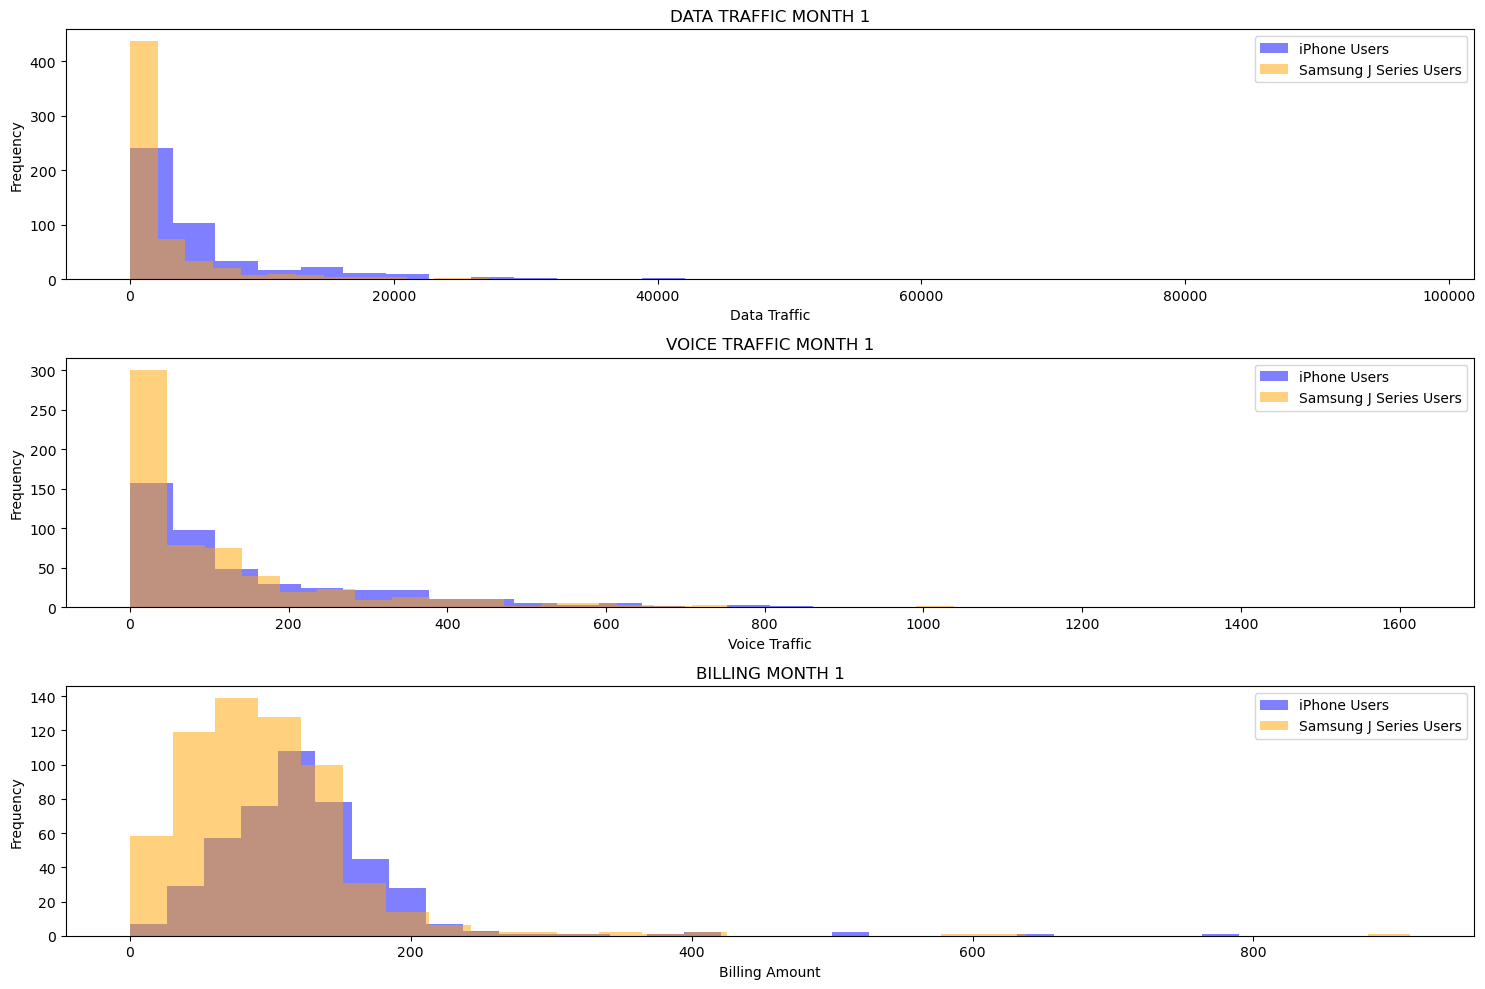

In [33]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.hist(iphone_users['DATA_TRAFFIC_MONTH_1'], bins=30, alpha=0.5, label='iPhone Users', color='blue')
plt.hist(samsung_j_users['DATA_TRAFFIC_MONTH_1'], bins=30, alpha=0.5, label='Samsung J Series Users', color='orange')
plt.title('DATA TRAFFIC MONTH 1')
plt.xlabel('Data Traffic')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(3, 1, 2)
plt.hist(iphone_users['VOICE_TRAFFIC_MONTH_1'], bins=30, alpha=0.5, label='iPhone Users', color='blue')
plt.hist(samsung_j_users['VOICE_TRAFFIC_MONTH_1'], bins=30, alpha=0.5, label='Samsung J Series Users', color='orange')
plt.title('VOICE TRAFFIC MONTH 1')
plt.xlabel('Voice Traffic')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(3, 1, 3)
plt.hist(iphone_users['BILLING_MONTH_1'], bins=30, alpha=0.5, label='iPhone Users', color='blue')
plt.hist(samsung_j_users['BILLING_MONTH_1'], bins=30, alpha=0.5, label='Samsung J Series Users', color='orange')
plt.title('BILLING MONTH 1')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


<font size="+1" color="blue">The comparison between Apple iPhone users and Samsung J series users reveals significant differences in usage patterns. iPhone users generally have higher data traffic, indicating they may engage more in data-intensive activities like streaming and social media. The voice traffic is quite similar they have the same usage patterns indeppendently from the brand difference. Additionally, iPhone users typically face higher average billing amounts, likely due to their greater data consumption and the premium nature of iPhone plans. In contrast, Samsung J series users may opt for more budget-friendly options, resulting in lower overall bills. Overall, these findings highlight distinct user behaviors influenced by smartphone choice.

# 4. Extra decision tree model

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

features = ['PREVIOUS_DEVICE_MODEL', 'PREVIOUS_DEVICE_BRAND', 'MONTHS_LAST_DEVICE']
target = 'PURCHASED_DEVICE_MANUFACTURER'

le = LabelEncoder()
for feature in features + [target]:
    df_imputed[feature] = le.fit_transform(df_imputed[feature].astype(str))

X = df_imputed[features]
y = df_imputed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_3_vars = DecisionTreeClassifier(random_state=42)
model_3_vars.fit(X_train, y_train)

y_pred_3_vars = model_3_vars.predict(X_test)
accuracy_3_vars = accuracy_score(y_test, y_pred_3_vars)
print(f'Accuracy of the 3-variable model: {accuracy_3_vars:.2f}')

additional_features = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1']  # Example of additional features
all_features = features + additional_features

for feature in additional_features:
    df_imputed[feature] = pd.to_numeric(df_imputed[feature], errors='coerce')  # Ensure numerical values

X_new = df_imputed[all_features]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.3, random_state=42)

model_5_vars = DecisionTreeClassifier(random_state=42)
model_5_vars.fit(X_train_new, y_train_new)

y_pred_5_vars = model_5_vars.predict(X_test_new)
accuracy_5_vars = accuracy_score(y_test_new, y_pred_5_vars)
print(f'Accuracy of the 5-variable model: {accuracy_5_vars:.2f}')



Accuracy of the 3-variable model: 0.50
Accuracy of the 5-variable model: 0.43


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>